In [1]:
# Load the datset
import pandas as pd
df = pd.read_csv(r'datasets/sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11689 entries, 0 to 11688
Data columns (total 4 columns):
age             11689 non-null int64
workclass       11689 non-null object
fnlwgt          11689 non-null int64
capital-gain    11689 non-null int64
dtypes: int64(3), object(1)
memory usage: 365.4+ KB


In [2]:
print(df['workclass'].unique())

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [3]:
# mapping
workclass_map = {' Private':1, ' Local-gov': 2,' ?': 3, ' Self-emp-not-inc': 4, ' Federal-gov': 5, ' State-gov': 6, ' Self-emp-inc': 7, ' Without-pay': 8, ' Never-worked': 9}
df['workclass'] = df['workclass'].map(workclass_map)
# convert df to matrix
X = df.as_matrix()

C:\Users\n9604014\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [4]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=3, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X, categorical=[1]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
df['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df['Cluster_ID'].value_counts())

Cluster membership
0    5634
1    4285
2    1770
Name: Cluster_ID, dtype: int64


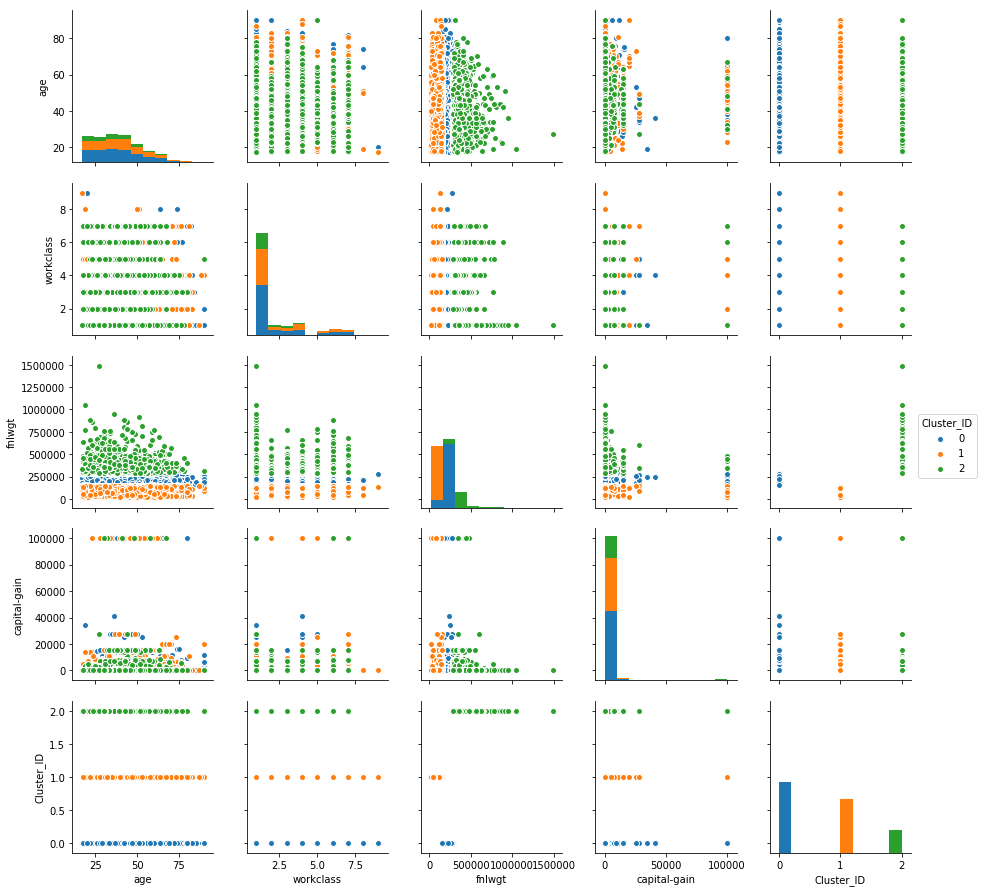

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df, hue='Cluster_ID')
plt.show()